---
title: Hinges
---

# Hinges

In [1]:
import shapely.geometry as sg
from foldable_robotics.layer import Layer
from foldable_robotics.laminate import Laminate
import numpy


Hinges are portions of a laminate device where the stiff material has been removed to permit the remaining flexible material to rotate.

The simplest hinge in a one-layer laminate is a perforated line

In [2]:
radius = .01
num_perforations = 5
num_segments = num_perforations*2+1
num_points = num_segments+1
a=numpy.r_[0:1:num_points*1j]
lines = []
for ii in range(int(len(a)/2)-1):
    p1 = sg.Point(a[2*ii+1]+radius,0)
    p2 = sg.Point(a[2*ii+2]-radius,0)
    lines.append(sg.LineString((p1,p2)))
hinge = Layer(*lines)
hinge<<=radius

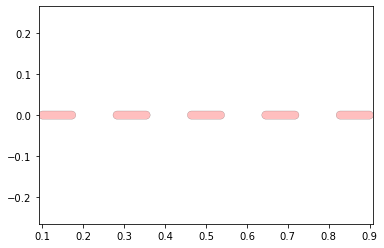

In [3]:
hinge.plot()

When you remove a perforated line from a material, it produces a weakened joint along that line:

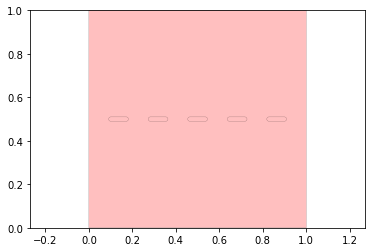

In [4]:
body = Layer(sg.box(0,0,1,1))
joint = body-hinge.translate(0,.5)
joint.plot()

In a multilayer laminate with a flexible center layer and two rigid outer layers, the simplest hinge is simply all the other layers removed except the flexible layer:

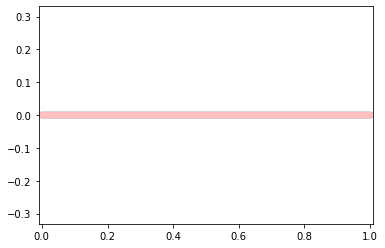

In [5]:
line = Layer(sg.LineString(((0,0),(1,0))))
line<<=radius
line.plot()

In [6]:
multilayer_hinge = Laminate(line,line,Layer(),line,line)
multilayer_body = Laminate(body,body,body,body,body)
joint = multilayer_body - multilayer_hinge.translate(0,.5)

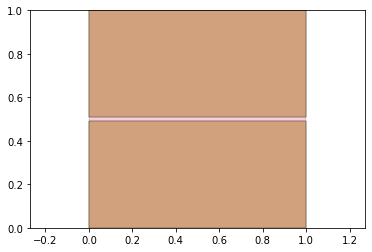

In [7]:
joint.plot()

### Castellated Joints

A castellated joint is often preferred because it permits tight radii of curvature.  It puts stresses on the rigid layers, though

1


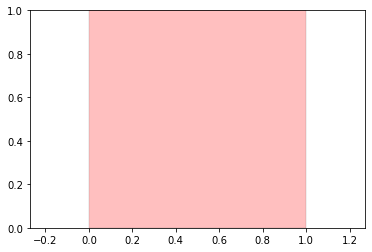

In [8]:
num_segments = 5

b1 = Layer(sg.box(0,0,1,1))

for ii in range(int(num_segments/2))[1:]:
    print(ii)
    b1|b1.translate(ii*2,0)
b1.plot()

In [9]:
num_segments/2

2.5

In [10]:
list(range(int(num_segments/2)))

[0, 1]